In [45]:
import numpy as np
from scipy import signal
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
import scienceplots
from gwpy.timeseries import TimeSeries
from gwpy.plot import Plot
from matplotlib.ticker import LogLocator

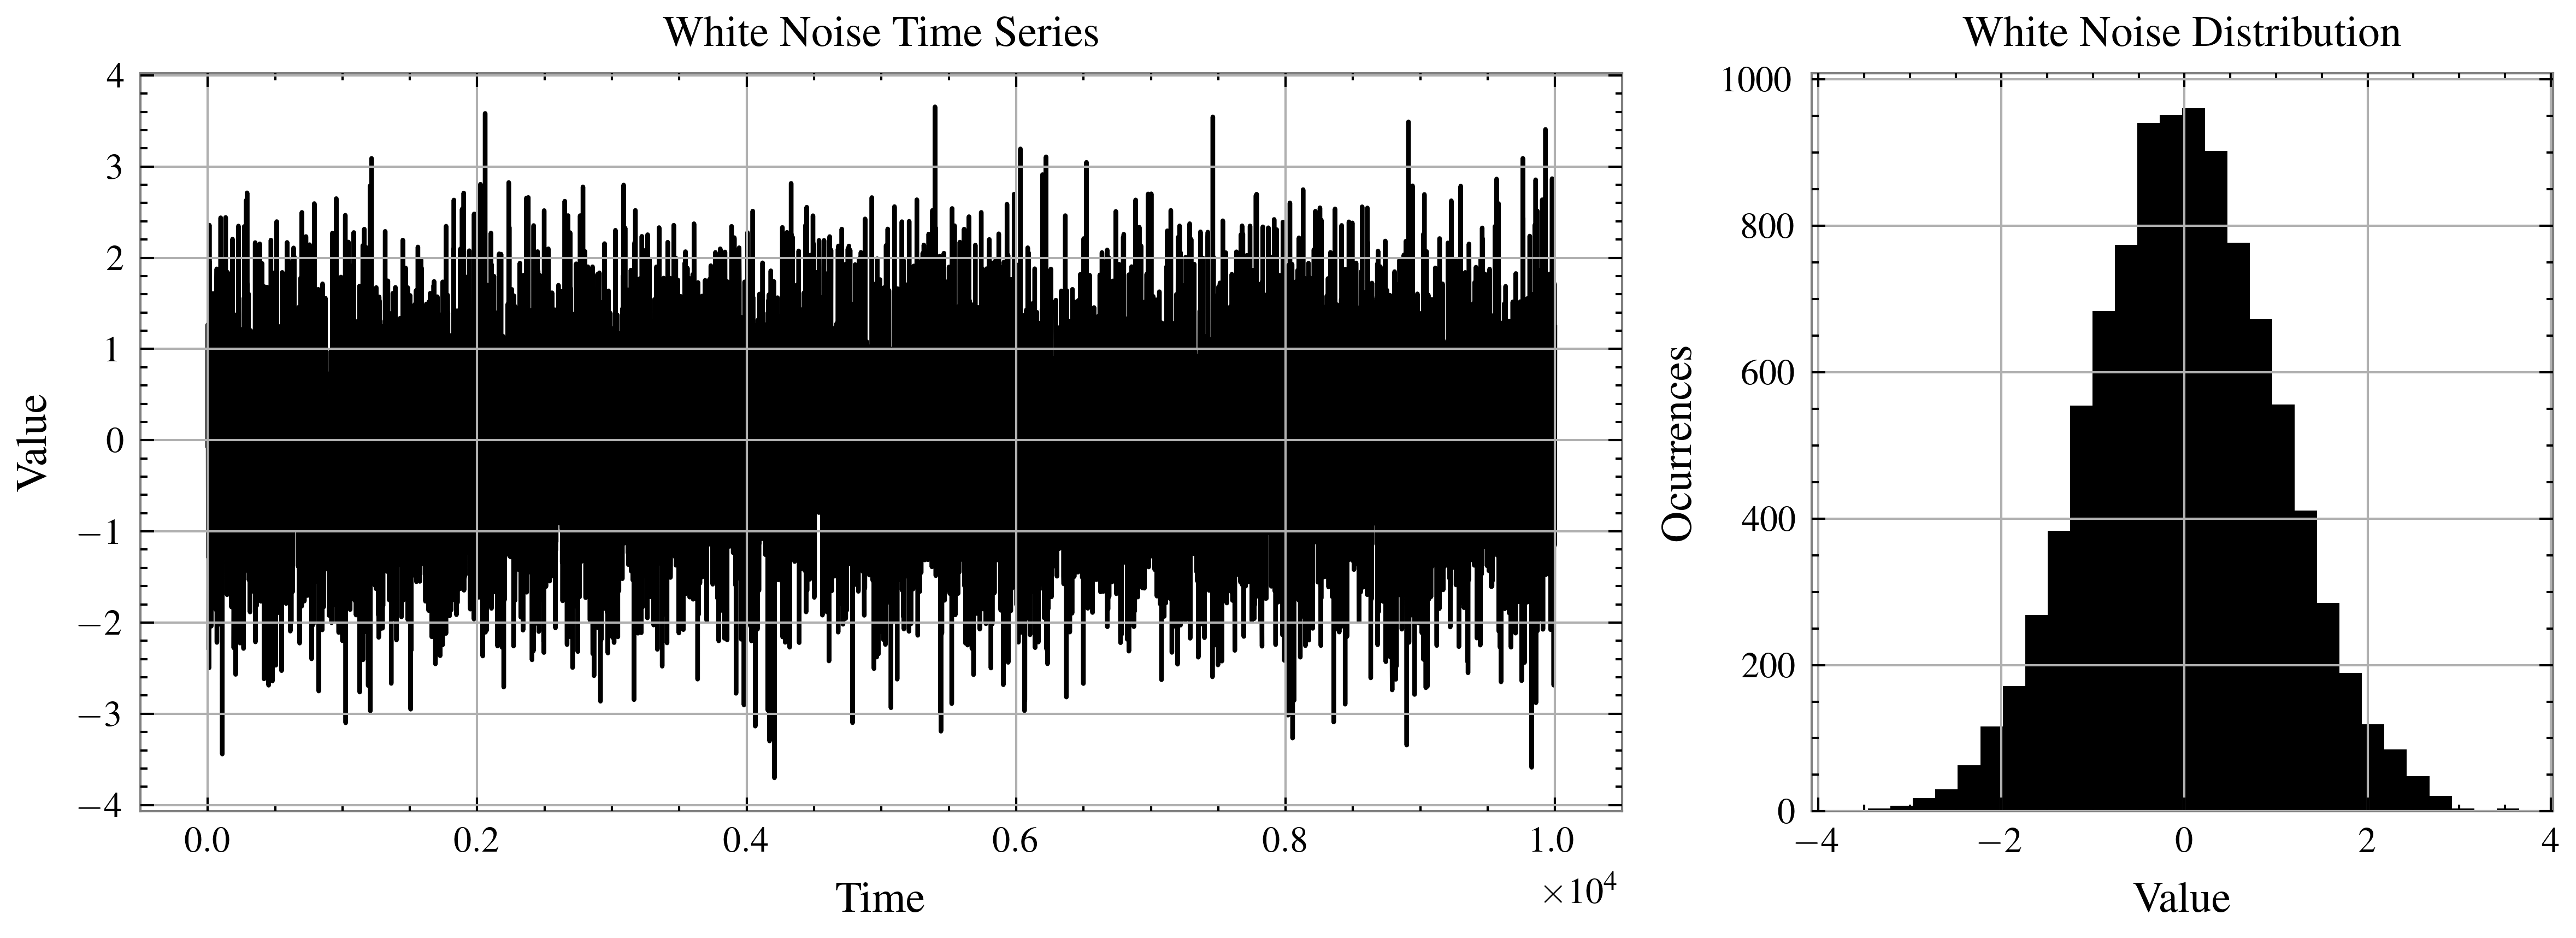

In [43]:
plt.style.use(['science', 'ieee'])

def white_noise(mean, std_dev, num_samples):
    return np.random.normal(mean, std_dev, num_samples)


noise = white_noise(0, 1, 10000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3), gridspec_kw={'width_ratios': [2, 1]})

ax1.plot(noise)
ax1.set_title('White Noise Time Series')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')

ax2.hist(noise, 30)
ax2.set_title('White Noise Distribution')
ax2.set_xlabel('Value')
ax2.set_ylabel('Ocurrences')

plt.tight_layout()
fig.savefig('paperfigs/white_noise_dist.png', dpi=300)

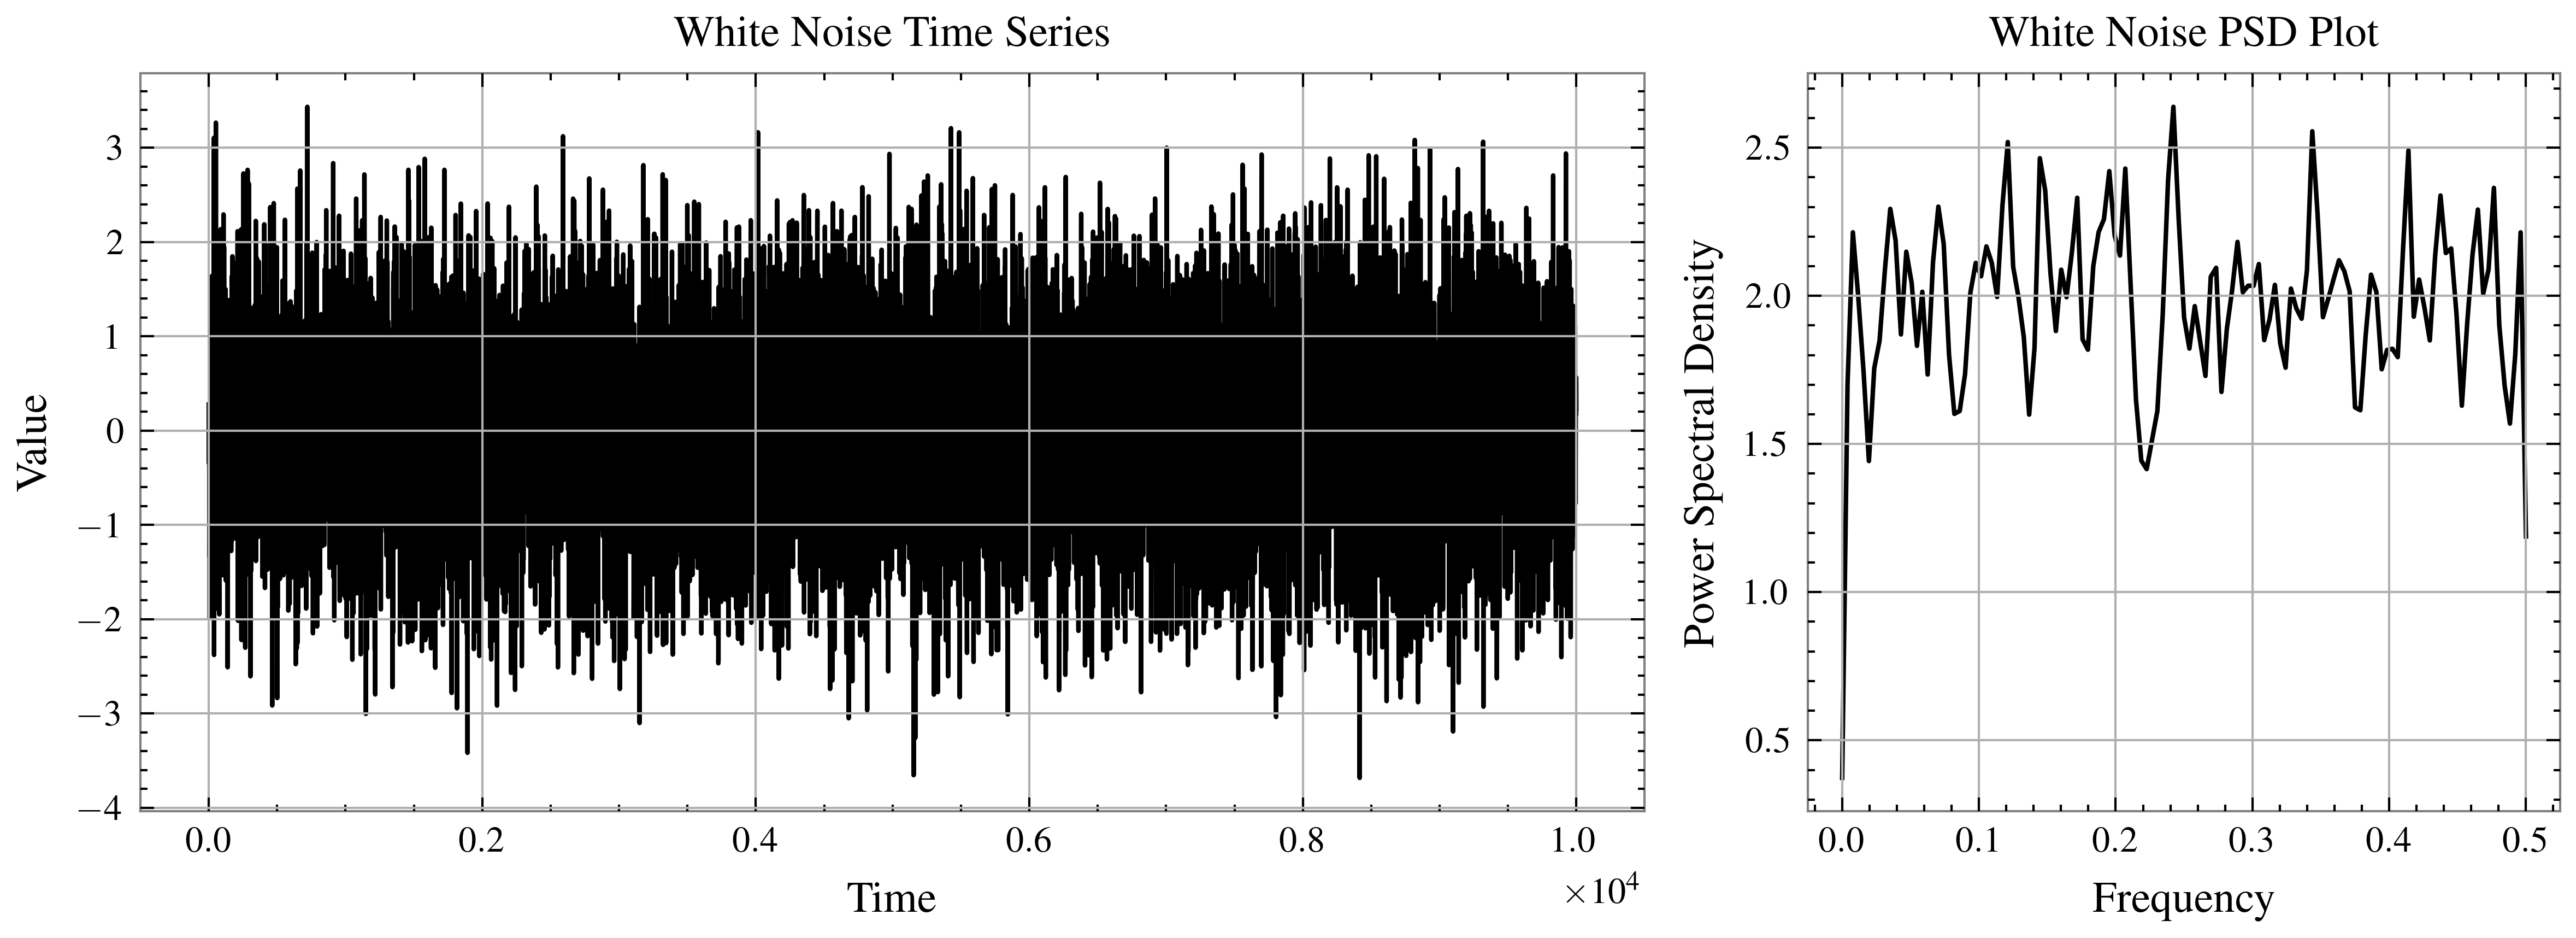

In [42]:
(frequencies, psd) = signal.welch(noise)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3), gridspec_kw={'width_ratios': [2,1]})

ax1.plot(noise)
ax1.set_title('White Noise Time Series')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')

ax2.plot(frequencies, psd)
ax2.set_title('White Noise PSD Plot')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power Spectral Density')

plt.tight_layout()
fig.savefig('paperfigs/white_noise_psd.png', dpi=300)

In [5]:
hdata = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478)

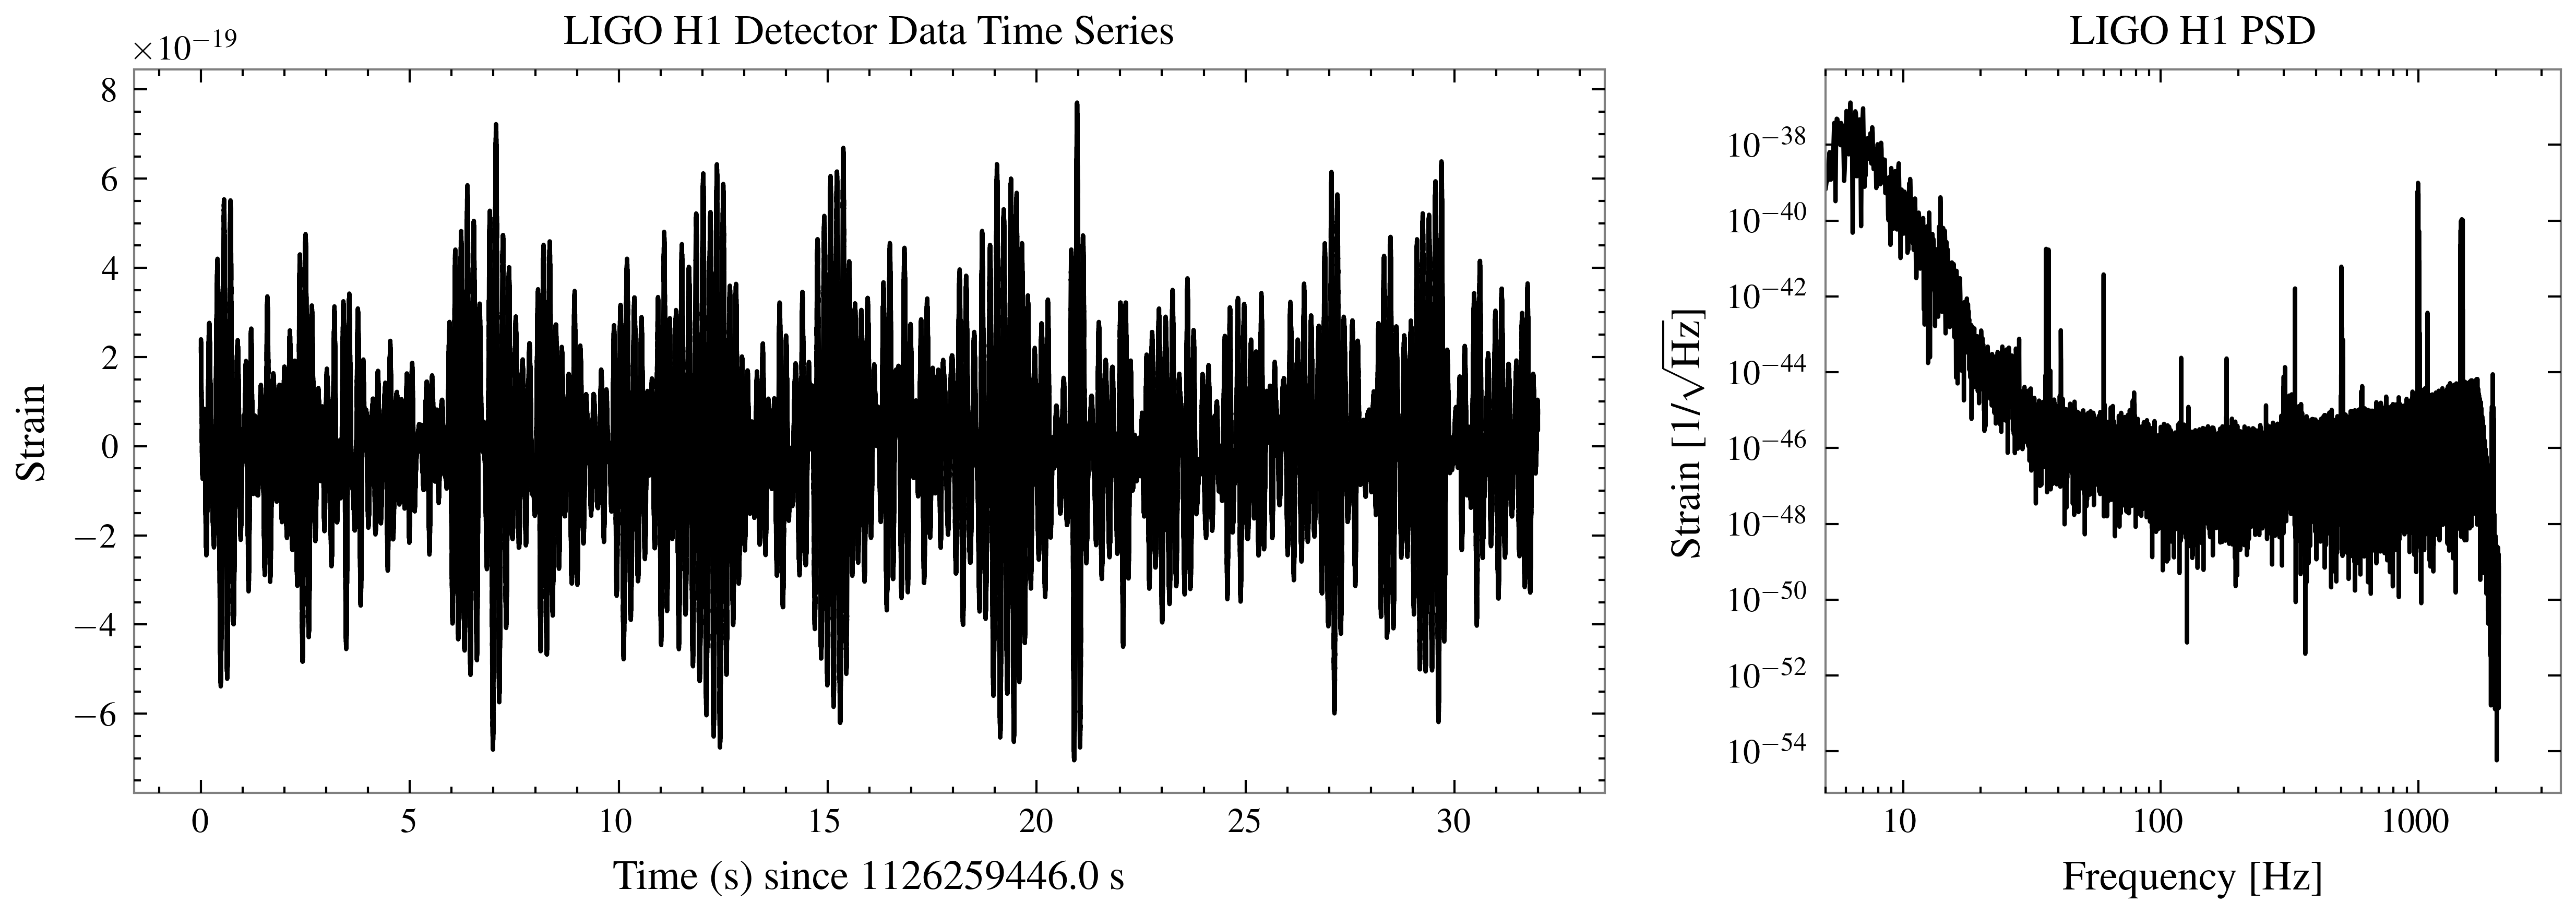

In [59]:
plt.style.use(['science', 'ieee'])

psd = hdata.psd()
# print(len(hdata))

time_vals = np.arange(0, len(hdata) * hdata.dt.value, hdata.dt.value)
# print(len(time_vals))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3), gridspec_kw={'width_ratios': [2,1]})

ax1.plot(time_vals, hdata.value)
ax1.set_title('LIGO H1 Detector Data Time Series')
ax1.set_xlabel(f'Time (s) since {hdata.t0}')
ax1.set_ylabel('Strain')
ax1.grid(False)

freq_vals = np.arange(0, len(psd) * psd.df.value, psd.df.value)

ax2.loglog(freq_vals, psd.value)
ax2.set_xlim(left=5)
ax2.set_title('LIGO H1 PSD')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel(r'Strain [1/$\sqrt{\text{Hz}}$]')
ax2.grid(False)

ax2.xaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
ax2.yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))

plt.savefig('paperfigs/sample_h1_psd.png', dpi=300)